In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Zadanie 5
Przy użyciu danych dotyczących temperatury i zużycia energii, zaimplementuj regresję
grzbietową w Pythonie. Stwórz modele regresji grzbietowej i Lasso przy użyciu biblioteki
scikit-learn. Dobierz odpowiednie wartości parametrów regularyzacji (alpha). Porównaj
wyniki regresji z różnymi parametrami regularyzacji. Porównaj wyniki regresji z regresją
liniową i zidentyfikuj, która metoda daje najlepsze wyniki.



0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: time_n, dtype: datetime64[ns]
 wymiary (1094, 3)
 typy danych: time_n                datetime64[ns]
temperature                  float64
energy_consumption           float64
dtype: object


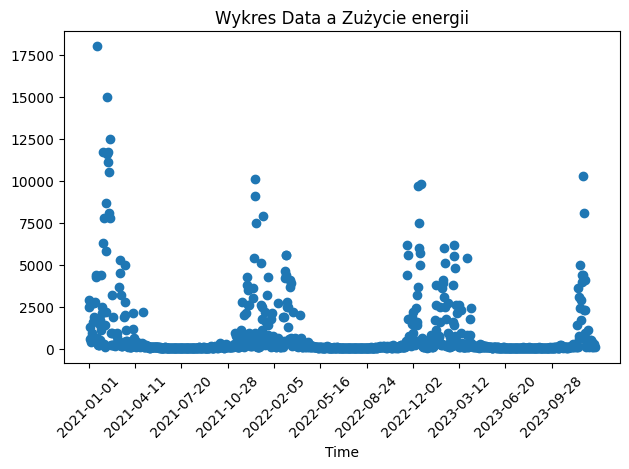

In [13]:
# Wczytanie danych z pliku CSV
df = pd.read_csv('data/temperature_and_energy_consumption.csv')
df['time_n'] = pd.to_datetime(df['time_n'])
df['energy_consumption'] = pd.to_numeric(df['energy_consumption'], errors='coerce')
print(df['time_n'].head())

# Sprawdzenie wymiarów DataFrame
print(f" wymiary {df.shape}")

# Typy danych
print(f" typy danych: {df.dtypes}")


plt.scatter(df['time_n'], df['energy_consumption'])
# wyświetl tylko co 100 dzień z df['time_n'] w wykresie
plt.xticks(df['time_n'][::100], rotation=45)
plt.xlabel("Time")
plt.title("Wykres Data a Zużycie energii")
plt.tight_layout()

# Stworzenie modelu regresji grzbietowej


In [27]:
# Dane do modelu podział na treningowe i testowe
X = df[['energy_consumption']]
y = df['temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Tworzenie modelu
alpha = 0.001 # Parametr regularyzacji
model = Ridge(alpha=alpha)
# Dopasowanie modelu do danych
model.fit(X_train, y_train)
# Ocena modelu
print(f"R2: {model.score(X, y)}")
# Przewidywanie cen mieszkań
y_pred = model.predict(X_test)

R2: 0.3886885167482932


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


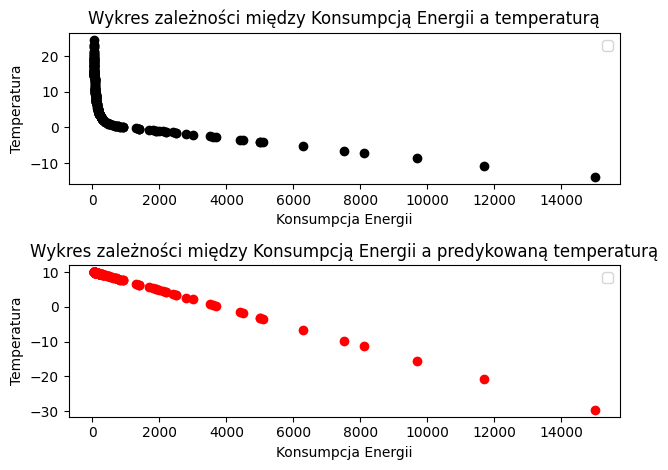

In [41]:
# Wizualizacja wyników
fig, ax = plt.subplots(2)
ax[0].scatter(X_test, y_test, color='black')
ax[0].set_xlabel("Konsumpcja Energii")
ax[0].set_ylabel("Temperatura")
ax[0].set_title("Wykres zależności między Konsumpcją Energii a temperaturą")

ax[1].scatter(X_test, y_pred, color='red')
ax[1].set_xlabel("Konsumpcja Energii")
ax[1].set_ylabel("Temperatura")
ax[1].set_title("Wykres zależności między Konsumpcją Energii a predykowaną temperaturą")

ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()


# Stworzenie modelu regresji Lasso

In [43]:
# Tworzenie modelu
alpha = 0.001 # Parametr regularyzacji
model = Lasso(alpha=alpha)
# Dopasowanie modelu do danych
model.fit(X_train, y_train)
# Ocena modelu
print(f"R2: {model.score(X, y)}")
# Przewidywanie cen mieszkań
y_pred = model.predict(X_test)


R2: 0.388688517717371


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


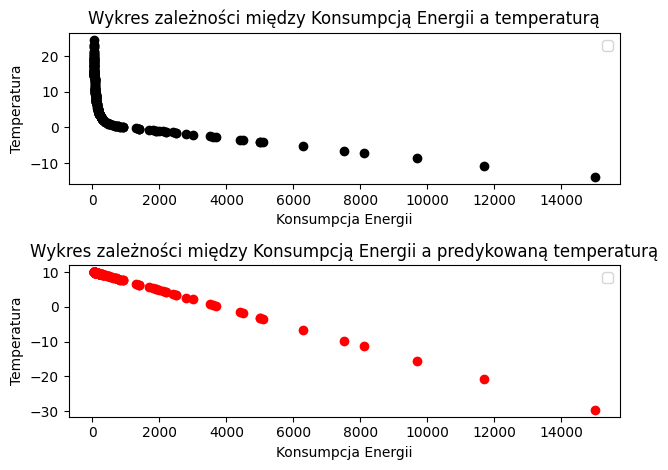

In [42]:
# Wizualizacja wyników
fig, ax = plt.subplots(2)
ax[0].scatter(X_test, y_test, color='black')
ax[0].set_xlabel("Konsumpcja Energii")
ax[0].set_ylabel("Temperatura")
ax[0].set_title("Wykres zależności między Konsumpcją Energii a temperaturą")

ax[1].scatter(X_test, y_pred, color='red')
ax[1].set_xlabel("Konsumpcja Energii")
ax[1].set_ylabel("Temperatura")
ax[1].set_title("Wykres zależności między Konsumpcją Energii a predykowaną temperaturą")

ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()